# Contours : Bắt đầu với đường biên trong OpenCV

---

## Mục tiêu
- Hiểu đường biên (contour) là gì.  
- Biết cách tìm đường biên và vẽ đường biên.  
- Làm quen với các hàm: `cv.findContours()`, `cv.drawContours()`.

---

## Đường biên (Contours) là gì?
- Đường biên có thể hiểu đơn giản là một **đường cong nối tất cả các điểm liên tục dọc theo ranh giới** có cùng màu hoặc cùng cường độ sáng.  
- Đường biên rất hữu ích trong **phân tích hình dạng, phát hiện đối tượng và nhận dạng**.  

⚠️ Lưu ý:  
- Nên dùng **ảnh nhị phân** để có kết quả chính xác hơn (dùng threshold hoặc Canny).  
- Trong OpenCV, tìm contour giống như tìm **đối tượng màu trắng trên nền đen**.  
- Từ OpenCV 3.2, hàm `findContours()` sẽ không thay đổi ảnh gốc nữa.  

---


In [41]:
# cv.drawContours(image, contours, contourIdx, color, thickness)
# - image: ảnh gốc mà bạn muốn vẽ lên.
# - contours: danh sách các contour (do cv.findContours() trả về).
# - contourIdx: chỉ số contour bạn muốn vẽ. Nếu để -1 thì sẽ vẽ tất cả contours.
# - color: màu viền (ví dụ (0,255,0) là xanh lá).
# - thickness: độ dày nét vẽ (ví dụ 3).

Số contours tìm được: 4


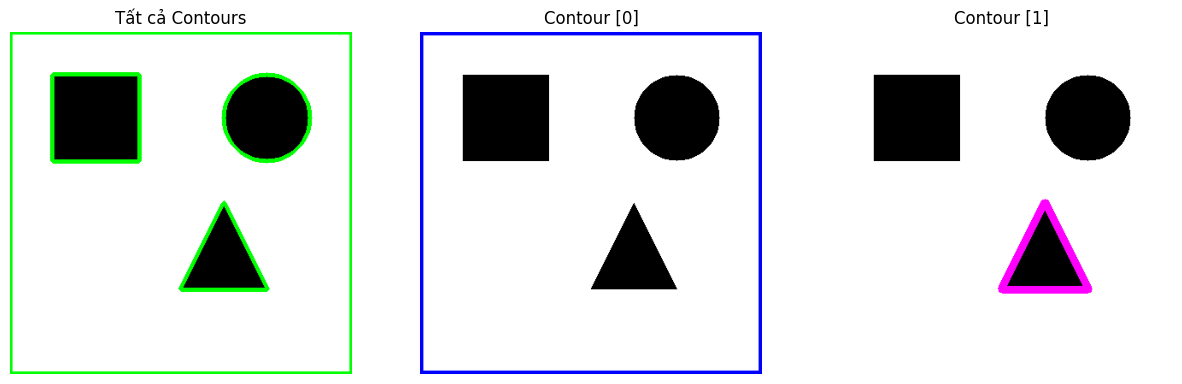

In [44]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# ======================
# Tạo ảnh trắng có nhiều hình để có nhiều contours
# ======================
im = np.ones((400,400,3), dtype=np.uint8) * 255   # nền trắng
cv.rectangle(im, (50,50), (150,150), (0,0,0), -1)    # hình vuông đen
cv.circle(im, (300,100), 50, (0,0,0), -1)            # hình tròn đen
pts = np.array([[200,300],[250,200],[300,300]], np.int32)  # tam giác
cv.fillPoly(im, [pts], (0,0,0))

# Chuyển sang ảnh xám
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Nhị phân hóa
ret, thresh = cv.threshold(imgray, 127, 255, 0)

# Tìm contours
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Đếm số contours
print("Số contours tìm được:", len(contours))

# ======================
# 1. Vẽ tất cả contours
# ======================
img_all = im.copy()
cv.drawContours(img_all, contours, -1, (0,255,0), 3)  # xanh lá

# ======================
# 2. Vẽ contour thứ 1 (index=0)
# ======================
img_one = im.copy()
if len(contours) > 0:
    cv.drawContours(img_one, contours, 0, (255,0,0), 6)  # xanh dương, dày hơn

# ======================
# 3. Vẽ contour lấy riêng cnt
# ======================
img_cnt = im.copy()
if len(contours) > 1:
    cnt = contours[1]
    cv.drawContours(img_cnt, [cnt], 0, (255,0,255), 8)  # tím, dày hơn

# ======================
# Hiển thị
# ======================
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img_all, cv.COLOR_BGR2RGB))
plt.title("Tất cả Contours")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(img_one, cv.COLOR_BGR2RGB))
plt.title("Contour [0]")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(img_cnt, cv.COLOR_BGR2RGB))
plt.title("Contour [1]")
plt.axis("off")

plt.show()
